# 4.1 선형회귀

선형 모델은 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더해 예측을 만든다.
- y햇 = θ+θ1x1 + ... + θnxn
- y햇 : 예측값
- n : 특성의 수
- xi : i번째 특성값 
- θj : j번째 모델 파라미터

y햇 = hθ(x) = θ*x 형태로 간단하게 쓸 수 있음
- θ : 편향 θ0과 θ1에서 θn까지의 특성 가중치를 다은 모델의 파라미터 벡터
- x : x는 x0에서 xn까지 담은 샘플의 특성 벡터. x0는 항상 1

모델을 훈련시킨다는 것음 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해서는 RMSE를 최소화하는 θ를 찾아야한다. 즉, MSE를 최소화하는 θ를 찾는다.

## 4.1.1 정규방정식

- 정규방정식 : 비용 함수를 최소화하는 θ값을 찾기 위한 해석적인 방법 

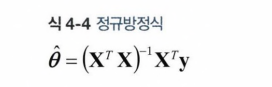

이 공식을 테스트하기위해 선형처럼 보이는 데이터 생성

In [20]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [21]:
X,y

(array([[0.92870706],
        [1.4214321 ],
        [0.65275321],
        [1.67217466],
        [1.78055326],
        [0.40552216],
        [1.77411405],
        [0.78824232],
        [0.70417503],
        [1.49031704],
        [1.66322221],
        [0.31825865],
        [0.9616083 ],
        [0.35712864],
        [0.99857453],
        [1.21484679],
        [1.02057351],
        [0.94094093],
        [0.53913508],
        [0.84220228],
        [1.70390291],
        [0.63823756],
        [1.23683248],
        [0.17677581],
        [0.94216428],
        [1.59910577],
        [1.84363695],
        [0.53532779],
        [0.42059942],
        [1.99725728],
        [1.4214253 ],
        [1.83633617],
        [0.30052835],
        [1.14221245],
        [1.73937559],
        [0.1645792 ],
        [1.29821252],
        [0.08632385],
        [1.43516668],
        [1.19817329],
        [0.37329084],
        [0.93914746],
        [0.08574463],
        [0.47102244],
        [0.83145285],
        [0

In [22]:
#정규방정식을 사용해 θ햇 계산
#inv()함수를 사용해 역행렬 계산
#dot() 메서드를 사용해 행렬 곱셈
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 X0 = 1 추가
#np.c_[a,b] = 두 개의 1차원 배열을 칼럼을 세로로 붙여서 2차원 배열 만들기
X_b

array([[1.        , 0.92870706],
       [1.        , 1.4214321 ],
       [1.        , 0.65275321],
       [1.        , 1.67217466],
       [1.        , 1.78055326],
       [1.        , 0.40552216],
       [1.        , 1.77411405],
       [1.        , 0.78824232],
       [1.        , 0.70417503],
       [1.        , 1.49031704],
       [1.        , 1.66322221],
       [1.        , 0.31825865],
       [1.        , 0.9616083 ],
       [1.        , 0.35712864],
       [1.        , 0.99857453],
       [1.        , 1.21484679],
       [1.        , 1.02057351],
       [1.        , 0.94094093],
       [1.        , 0.53913508],
       [1.        , 0.84220228],
       [1.        , 1.70390291],
       [1.        , 0.63823756],
       [1.        , 1.23683248],
       [1.        , 0.17677581],
       [1.        , 0.94216428],
       [1.        , 1.59910577],
       [1.        , 1.84363695],
       [1.        , 0.53532779],
       [1.        , 0.42059942],
       [1.        , 1.99725728],
       [1.

In [23]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [24]:
#이 데이터를 생성하기 위해 사용한 함수는 y = 4+3x1+가우시안_잡음
theta_best
#θ0 = 4, θ1 = 3을 기대했지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재혀낳지 못했음

array([[4.4568083 ],
       [3.00796567]])

In [30]:
#θ햇을 사용해 예측
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4568083 ],
       [10.47273965]])

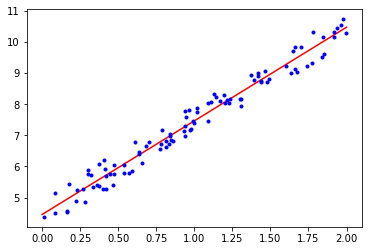

In [32]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict,"r-")
plt.plot(X,y, "b.")

In [43]:
#사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print("θ0 : ",lin_reg.intercept_ , "θ1 : ",lin_reg.coef_)

θ0 :  [4.4568083] θ1 :  [[3.00796567]]


In [44]:
lin_reg.predict(X_new)

array([[ 4.4568083 ],
       [10.47273965]])

In [42]:
#LinearRegression 클래스는 scipy.linalg.lstsq()함수(최소제곱)를 기반으로 하며 이 함수를 직접 호출 가능
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.4568083 ],
       [3.00796567]])

In [45]:
#np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있다.
np.linalg.pinv(X_b).dot(y)

array([[4.4568083 ],
       [3.00796567]])

- 유사역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됩니다. SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈으로 분해. 

## 4.1.2 계산 복잡도
- LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2) : 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 증가.

# 4.2 경사 하강법(Gradient descent)
- 여러 종류의 문제에서 최적의 해법을 차즐 수 있는 일반적인 최적화 알고리즘
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- 파라미터 벡터 θ에 대해 비용 함수의 현재 그레이디언트를 계산합니다. 그리고 그레이디언트가 감소하는 방향으로 진행. 

## 주요 파라미터
1) 학습률(learning rate) : 스텝의 크기
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸리고 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못한다.

## 문제점
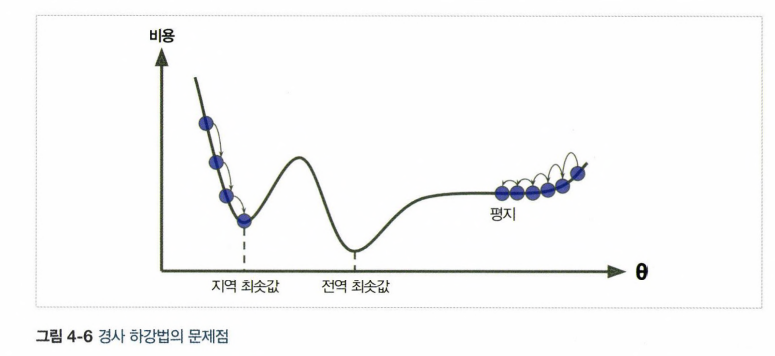
- 무작위 초기값 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴한다. 
- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다. 

## 4.2.1 배치 경사 하강법
- 경사 하강법을 구현하려면 각 모델 파라미터 θj에 대해 비용 함수의 그레이디언트를 계산해야 한다. 다시 말해 θj가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야하고 이를 편도함수라고 한다.
- 배치 경사 하강법 : 매 스텝에서 훈련 데이터 전체를 사용하기 때문에 매우 큰 훈련 세트에서는 아주 느리다. 


In [59]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [60]:
theta

array([[4.4568083 ],
       [3.00796567]])

### 반복 횟수 지정 방법
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 허용오차 보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지한다.

## 4.2.2 확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다. 
- 알고리즘이 빠르다며 매우 큰 훈련 세트도 훈련시킬 수 있다.
- 배치 경사 하강법보다 훨씬 불안정하다. 

### 학습 스케줄
- 매 반복에서 학습률을 결정하는 함수

In [67]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터
m = 100

def learning_schedule(t): #학습 스케줄 함수 
    return t0 / (t+t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [68]:
theta

array([[4.4699864 ],
       [2.98488291]])

- 일반적으로 한 반복에서 m번(훈련 세트에 있는 샘플 수) 되풀이 되고, 이때 각 반복을 에포크라고 한다. 
- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다. 

In [75]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
#max_iter : 에포크, tol = 1e-3 : 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행, eta : 학습률
sgd_reg.fit(X,y.ravel()) #y.ravel() : 다차원 배열을 1차원 배열로 평평하게 해주는 함수 

SGDRegressor(eta0=0.1, penalty=None)

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.42294204]), array([3.01615564]))

## 4.2.3 미니배치 경사 하강법
- 미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트 계산
- 장점 : GPU를 사용해서 얻는 성능 향상 

# 4.3 다항 회귀
- 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다. 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것.

In [185]:
m = 100
X = 6 * np.random.rand(m, 1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [186]:
X,y

(array([[ 2.89878943e+00],
        [ 1.38115492e+00],
        [-6.15647559e-01],
        [-2.60494824e+00],
        [ 1.47441776e-01],
        [ 7.64258634e-05],
        [ 4.79338536e-01],
        [-2.65870656e+00],
        [ 2.84352787e+00],
        [-1.64342083e-01],
        [ 1.69482518e+00],
        [ 2.10186708e+00],
        [-2.65048164e+00],
        [ 1.65332035e+00],
        [-2.20939953e+00],
        [ 2.46157086e+00],
        [ 1.99174147e+00],
        [ 8.47404512e-01],
        [ 2.47495801e+00],
        [-8.71962325e-01],
        [-3.33112243e-02],
        [ 7.30809738e-01],
        [-2.45348382e+00],
        [ 9.21972425e-02],
        [ 1.63556465e+00],
        [-2.68271447e+00],
        [ 1.48063176e+00],
        [-1.67765927e+00],
        [ 2.59722865e+00],
        [-1.75255240e+00],
        [-1.28799932e+00],
        [-1.01294051e+00],
        [ 2.84127464e+00],
        [ 2.71093117e+00],
        [-2.00572446e+00],
        [-2.10800401e+00],
        [-2.72788584e+00],
 

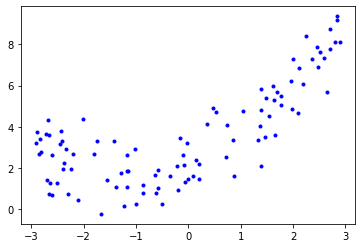

In [187]:
plt.plot(X,y, "b.")

In [188]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가한다.
- 예 : a,b가 있고 degree=3이라면 a^2, a^3, b^2, b^3, ab, a^2b, ab^2도 특성으로 추가
- interaction_only = True로 지정하며 거듭제곱이 포함된 항은 모두 제외. 즉, a,b,ab만 남는다.

In [189]:
X[0]

array([2.89878943])

In [190]:
X_poly[0] #훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가 

array([2.89878943, 8.40298017])

In [191]:
#이 확장된 훈련 데이터에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17099467]), array([[0.99578154, 0.44046048]]))

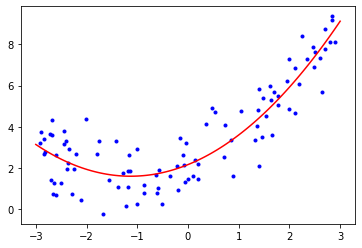

In [192]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, 'r-')

# 4.4 학습 곡선 

In [223]:
#300차 다항 회귀 모델을 이전의 훈련 데이터 적용예시

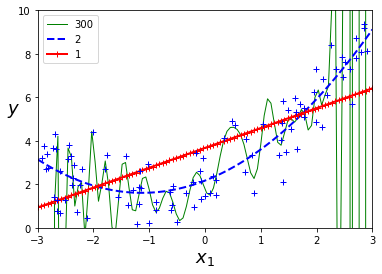

In [224]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b+", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되었다. 반면에 선형 모델은 과소적합 되었다. 


학습 곡선 : 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸다.  

In [225]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)+1):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", label = 'train')
    plt.plot(np.sqrt(val_errors),"b-", label = 'val')
    plt.legend()

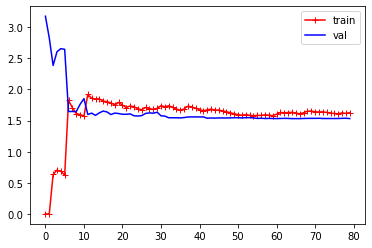

In [226]:
#단순 선형 회귀 모델(직선)의 학습 곡선 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

(0.0, 80.0, 0.0, 3.0)

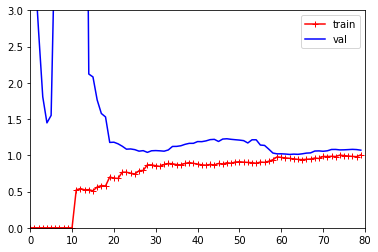

In [229]:
#10차 다항 회귀 모델의 학습 곡선 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())])
    
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])

훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.

두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다.

#### 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.
- 편향 : 잘못된 가정으로 인한 오차. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.
- 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타나는 오차. 자유도가 높은 모델(고차 다항 회귀 모델)이 높은 분산을가지기 쉬워 훈련 데이터에 과대적합되는 경향 존재.
- 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생하는 오차. 
* 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어들고 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.

# 4.5 규제가 있는 선형 모델
- 과대적합을 감소시키는 방법 : 모델 규제. 자유도를 줄이며 데이터에 과대적합되기 어려워진다.

## 4.5.1 릿지 회귀(ridge) 
- 규제가 추가된 선형 회귀 버전 
- 규제항을 비용 함수에 추가 
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력 
- α : 모델을 얼마나 많이 규제할지 조절 
    -  α= 0 : 릿지 회귀는 선형 회귀와 같아진다. 
    -  α가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다. 
    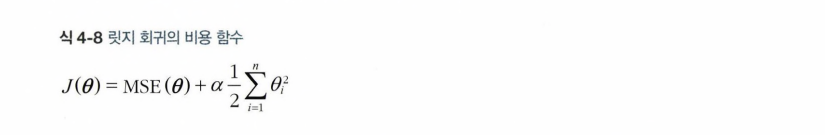
- 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. 규제가 있는 모델은 대부분 마찬가지

In [230]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [237]:
#사이킷런에서 정규방정식을 사용한 릿지회귀를 적용하는 예시

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [239]:
#확률적 경사 하강법 사용 예시
sdg_reg = SGDRegressor(penalty="l2") #릿지 회귀 = l2규제
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.53275428])

## 4.5.2 라쏘 회귀
- 가중치 벡터의 l1노름을 사용한다.
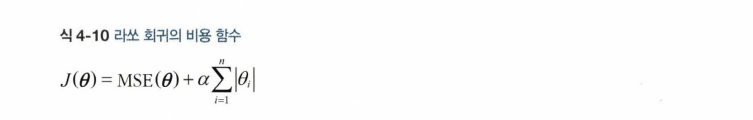
- 덜 중요한 특성의 가중치를 제거하려고 한다.(즉, 가중치가 0이 된다)
  - 자동으로 특성 선택을하고 희소 모델을 만든다.

In [240]:
#사이킷런에서 정규방정식을 사용한 라쏘회귀를 적용하는 예시

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [241]:
#확률적 경사 하강법 사용 예시
sdg_reg = SGDRegressor(penalty="l1") #릿지 회귀 = l2규제
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.59354589])

## 4.5.3 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 모델 
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용
- 혼합 정도는 혼합 비율 r을 사용
  - r = 0 : 릿지 회귀와 같음
  - r = 1 : 라쏘 회귀와 같음 
  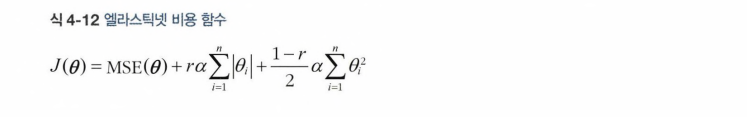
  
릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다. 불필요한 특성의 가중치를 0으로 만들어주기 때문에. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 연관되어 있을 때는 보통 라쏘가 문제가 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.

In [243]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 조기 종료
- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
  - 확률적, 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있다. 해결책은 검증 에러가 일정 시간 동안 최솟값보다 클 때(모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라키터로 되돌라는 것이다. 

In [251]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [255]:
from sklearn.base import clone

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)
#warm_start = True : fit()메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) #훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

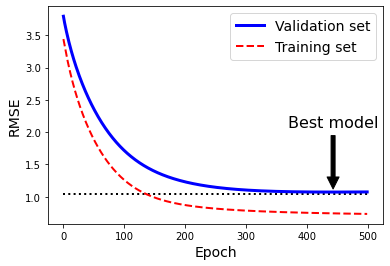

In [257]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [258]:
best_epoch, best_model

(443,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

# 4.6 로지스틱 회귀 
- 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용(이진 분류기)
  - 1 : 양성 클래스
  - 0 : 음성 클래스 
  
 ## 4.6.1 확률 추정
 - 입력 특성의 가중치의 합을 계산한 후 편향을 더하고 결괏값의 로지스틱을 출력한다.
 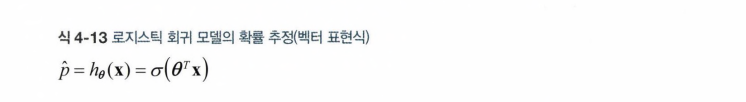
   - 0과 1사이의 값을 출력하는 시그모이드 함수(S자 형태)

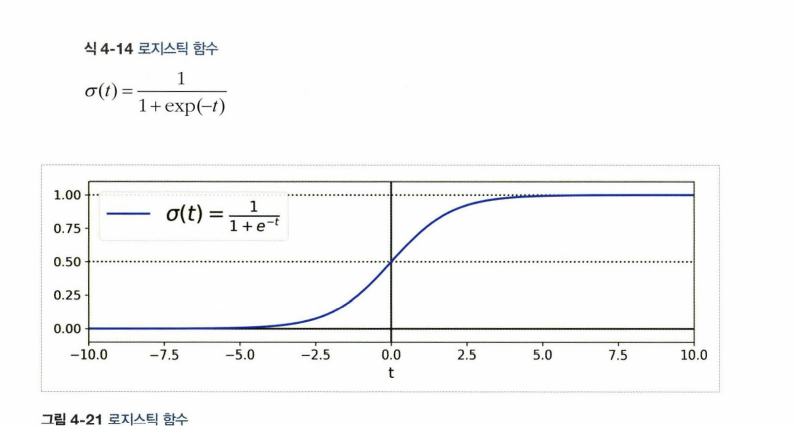

## 4.6.2 훈련과 비용 함수 
- 훈련의 목적 : y = 1에 대해서는 높은 확률로 추정하고 y = 0에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것
    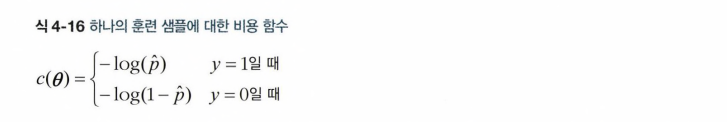
    
    
    

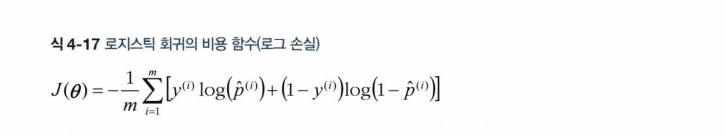 

# 4.6.3 결정 경계

In [259]:
#데이터 로드
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [261]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [269]:
X = iris["data"][:,3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) #Iris-Virginica면 1, 그렇지 않으면 0
y

<ipython-input-269-50539c29502d>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) #Iris-Virginica면 1, 그렇지 않으면 0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [270]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

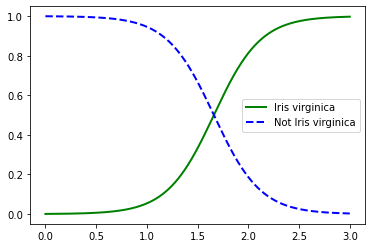

In [283]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()

In [287]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

C:\Users\qual9\Anaconda3\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


(0.0, 3.0, -0.02, 1.02)

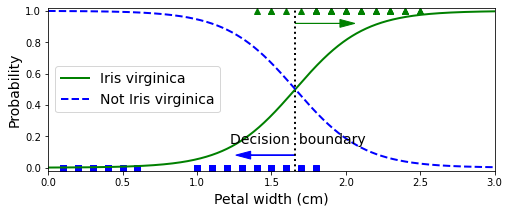

In [297]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

## 4.6.4 소프트맥스 회귀 

In [298]:
X = iris["data"][:,(2,3)] #꽃잎 길이, 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
#multi_class를 multinomial, solver 매개변수에 lbfgs를 지정하면 소프트맥스 회귀 사용 가능
#C를 사용하여 조절할 수 있는 L2규제 적용
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [299]:
softmax_reg.predict([[5,2]])

array([2])

In [301]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

(0.0, 7.0, 0.0, 3.5)

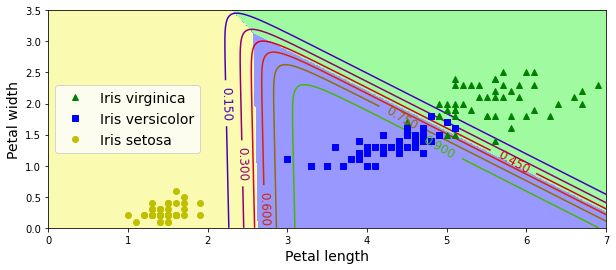

In [302]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

# 4.7 연습문제
1. . 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요
- 확률적 경사 하강법, 미니배치 경사 하강법

2. 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결할 수 있을까요?
- 스케일이 다르면 비용 함수는 타원 모양이 되기 때문에 경사 하강법 알고리즘이 수렴하는 데 시간이 오래 걸린다. 이를 해결하기 위해서는 데이터의 스케일을 조절해준다. 

3. 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있을까요?
- 로지스틱 회귀 모델의 비용 함수는 볼록 함수이기 때문에 지역 최솟값에 갇힐 가능성이 없다.

4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어낼까요?
- 학습률을 점점 감소시키지 않는다면 최적점에 수렴되지 못하고 맴돌게 된다. 즉, 매우 오랫동안 훈련해도 조금씩 다른 모델을 만든다.

5. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결 할수있나요?
- 학습률이 너무 높고 알고리즘이 발산한다. 이를 해결하기 위해서는 학습률을 낮추어야한다. 훈련 에러가 올라가지 않는다면 훈련 세트에 과대 적합 되어 있는 것이므로 훈련을 멈춰야한다.

6. 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법 인가요?
- 무작위성 때문에 매 훈련 반복마다 학습의 진전을 보장하지 못한다. 그러므로 검증 에러가 상승될 때 훈련을 즉시 멈춘다면 최저점에 도달하기 전에 너무 일찍 멈추게 될 수 있다. 더 나은 방법은 정기적으로 모델을 저장하고 오랫동안 진전이 없을 때 저장된 것 중 가자 좋은 모델로 복원하는 것이다. 

7. （우리가 언급한 것 중에서 ） 어떤 경사 하강법 알고리즘이 가장 빠르게 최적 솔루션의 주변에 도달할까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?
- 확률적 경사 하강법. 훈련 시간이 충분하다면 배치 경사 하강법만 실제로 수렴한다. 

8. 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다.무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?
- 검증 오차 > 훈련 오차 : 모델이 훈련 세트에 과대적합
1) 다항 차수를 낮춘다. 즉 자유도를 줄여 과대적합을 줄인다.
2) 모델을 규제한다.
3) 훈련 세트의 크기를 증가시킨다.

9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터a를 증가시켜야 할까요, 아니면 줄여야 할까요?
- 훈련 에러와 검증 에러가 거의 비슷하고 높다면 모델이 훈련 세트에 과소적합되었을 가능성이 높다. 즉, 높은 편향을 가진 모델로 규제 하이퍼파라미터를 감소시켜야 한다.

10. 다음과 같이 사용해야하는 이유는?
- 평범한 선형 회귀 （즉, 아무런 규제가 없는 모델） 대신 릿지 회귀 : 규제가 있는 모델이 일반적으로 규제가 없는 모델보다 성능이 좋다.
- 릿지 회귀 대신 라쏘 회귀 : 몇 개의 특성만 실제 유용할 것이라고 의심될 때 사용한다. 
- 라쏘 회귀 대신 엘라스틱넷 : 라쏘가 어떤 경우(몇 개의 특성이 강하게 연관되어 있거나 훈련 샘플보다 특성이 더 많을 때)에는 불규칙하게 행동하므로 엘라스틱넷을 사용한다. 

11. 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?
- 실외와 실내, 낮과 밤은 배타적인 클래스가 아니라 네 가지 조합이 모두 가능하므로 두 개의 로지스틱 회귀 분류기를 훈련시켜야 한다.

12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세

In [305]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [306]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [307]:
np.random.seed(2042)

In [308]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [309]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [311]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [312]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [313]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [314]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [315]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [316]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390373


In [317]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [318]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [319]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [320]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [321]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327975 early stopping!


In [322]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

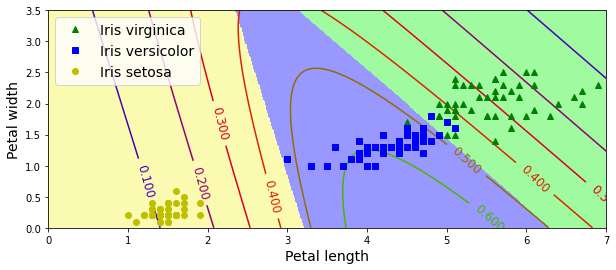

In [323]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [324]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333